In [1]:
import os
import sys
import yaml
from glob import glob
from copy import deepcopy
from pprint import pprint

import numpy as np
from corner import corner

# enable use of local modules
repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

from mejiro.utils import util

# read configuration file
with open('roman_hlwas_wide.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [2]:
if config['dev']:
    config['pipeline_dir'] += '_dev'

total = config['survey']['total_population']

In [3]:
data_dir = os.path.join(config['data_dir'], config['pipeline_dir'], '01')

detectable_csv = os.path.join(data_dir, 'detectable_pop.csv')
detectable_df = util.combine_all_csvs(data_dir, 'detectable', detectable_csv)

if total:
    total_csv = os.path.join(data_dir, 'total_pop.csv')
    total_df = util.combine_all_csvs(data_dir, 'total', total_csv)

Wrote combined CSV to /data/bwedig/mejiro/roman_hlwas_wide_dev/01/detectable_pop.csv
Wrote combined CSV to /data/bwedig/mejiro/roman_hlwas_wide_dev/01/total_pop.csv


In [4]:
band = 'F129'

labels = [
    r"$\sigma_v$",
    r"$\log(M_{*})$",
    r"$\theta_E$",
    r"$z_{\rm l}$",
    r"$z_{\rm s}$",
    r"$m_{\rm source}$",
    r"$m_{\rm lens}$",
    "SNR"
]

detectable_sample, total_sample = [], []

for i, row in detectable_df.iterrows():
    detectable_sample.append([
        row['vel_disp'],
        np.log10(row['m_star']),
        row['theta_e'],
        row['z_lens'],
        row['z_source'],
        row[f'mag_{band}_source'],
        row[f'mag_{band}_lens'],
        row['snr']
    ])

if total:
    for i, row in total_df.iterrows():
        total_sample.append([
            row['vel_disp'],
            np.log10(row['m_star']),
            row['theta_e'],
            row['z_lens'],
            row['z_source'],
            row[f'mag_{band}_source'],
            row[f'mag_{band}_lens'],
            row['snr']
        ])

In [5]:
def weights(data):
    return 1 / len(data) * np.ones(len(data))

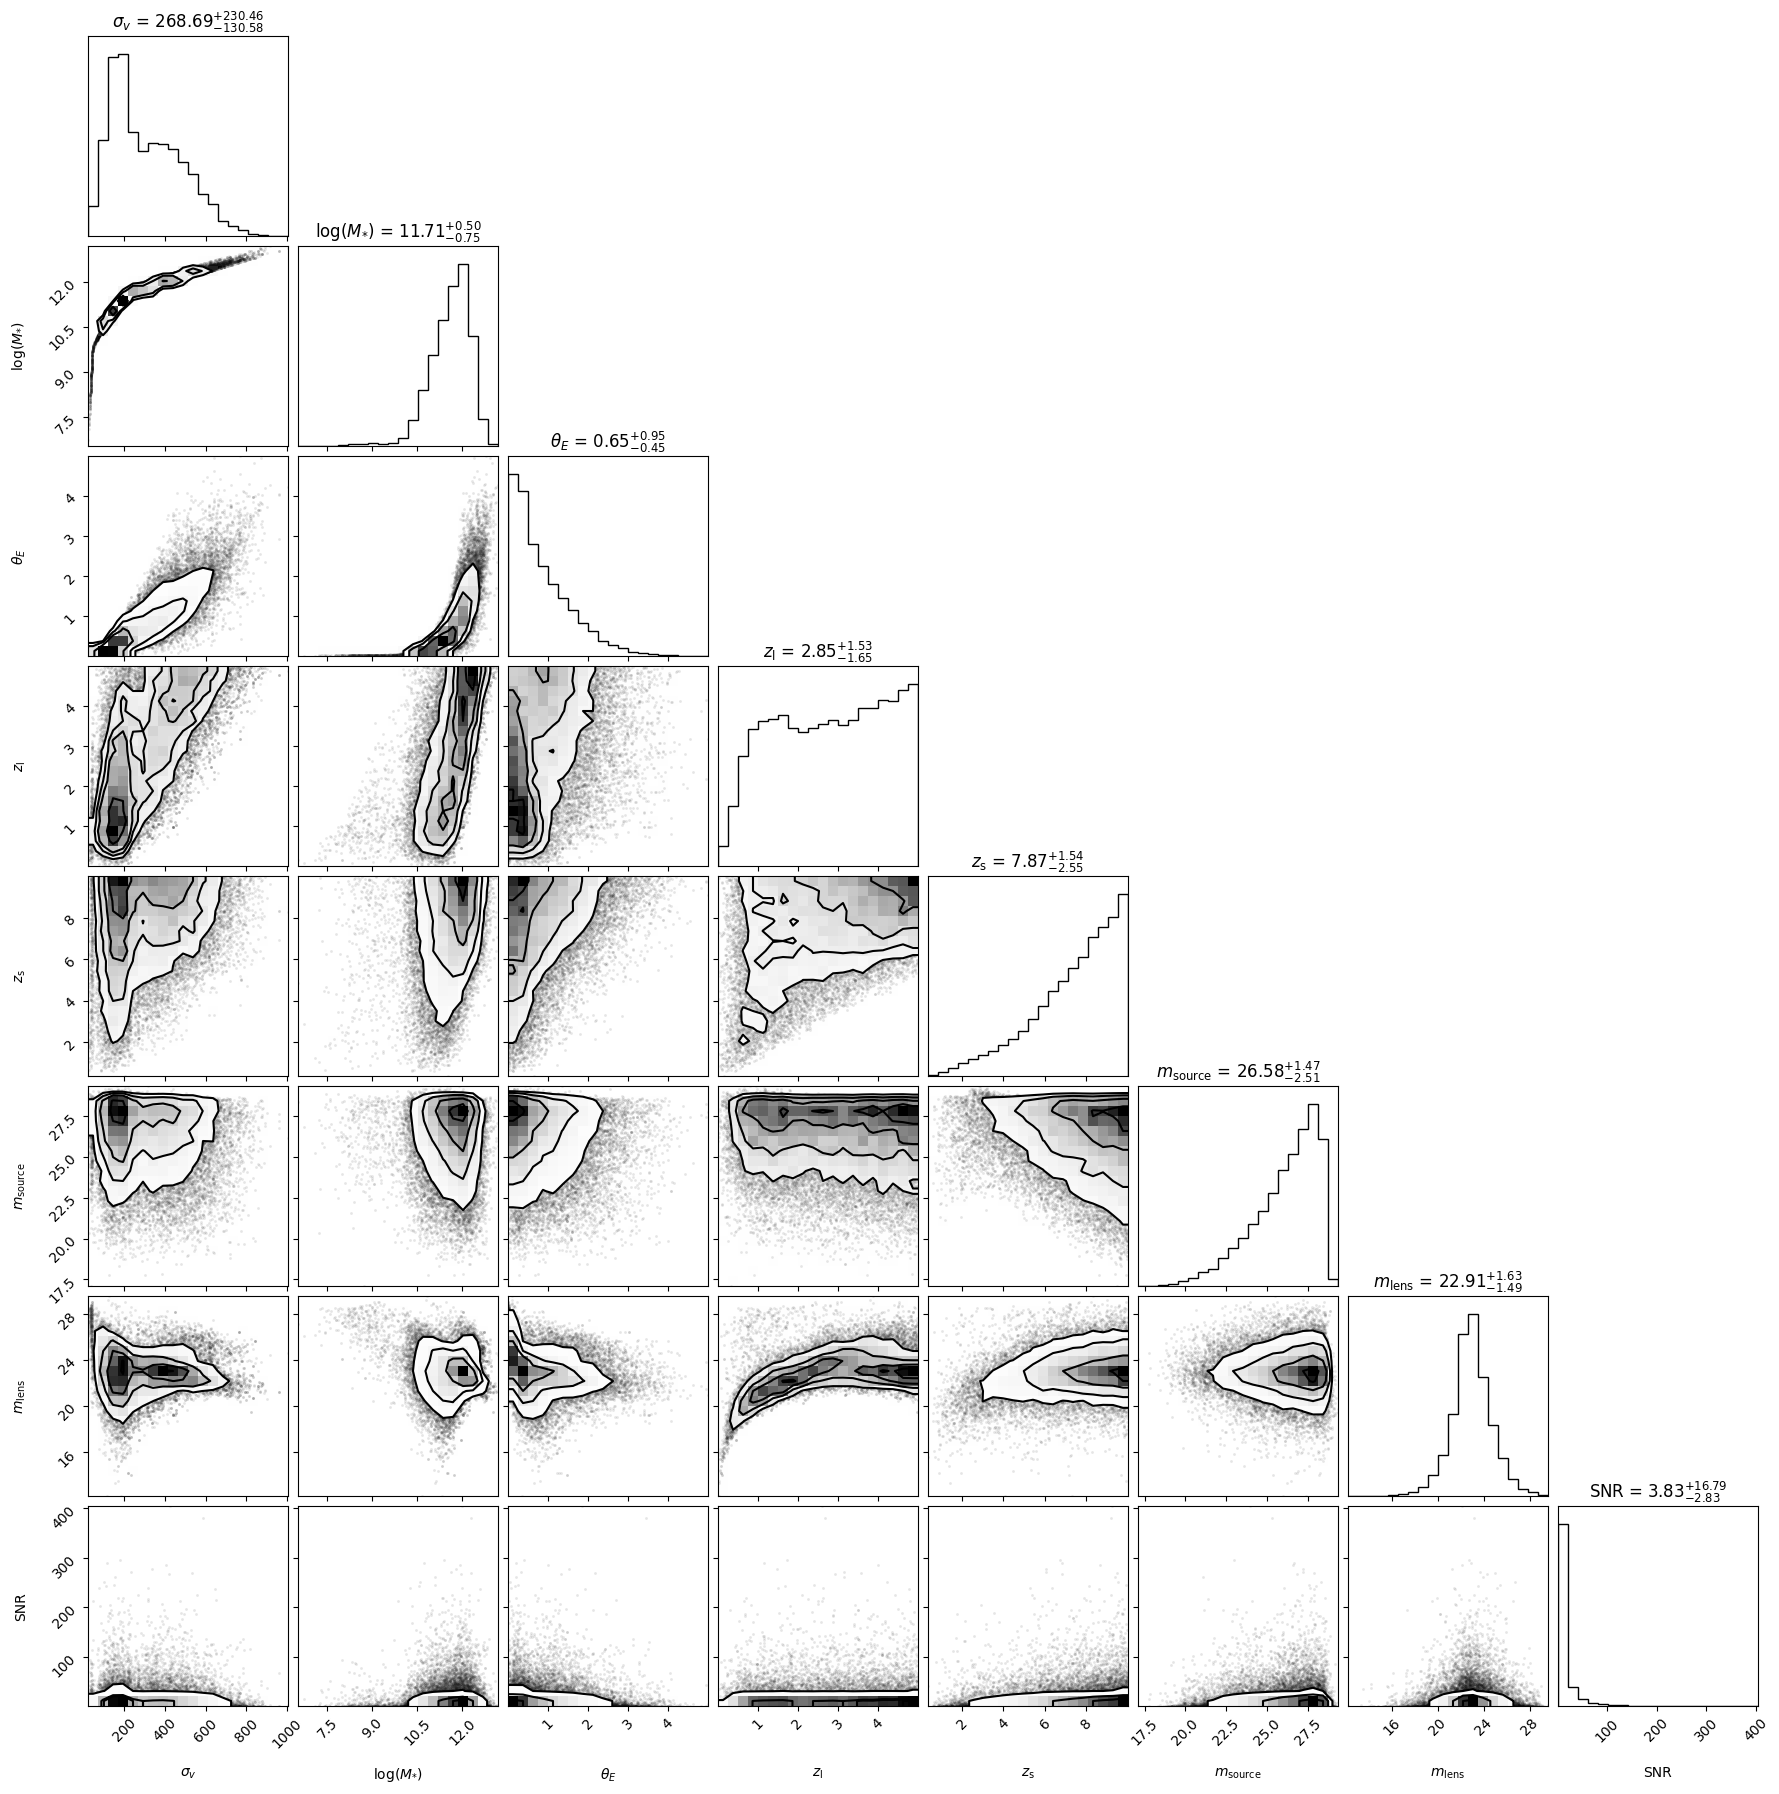

In [6]:
if total:
    total_corner = corner(np.array(total_sample), labels=labels, show_titles=True, weights=weights(total_sample))

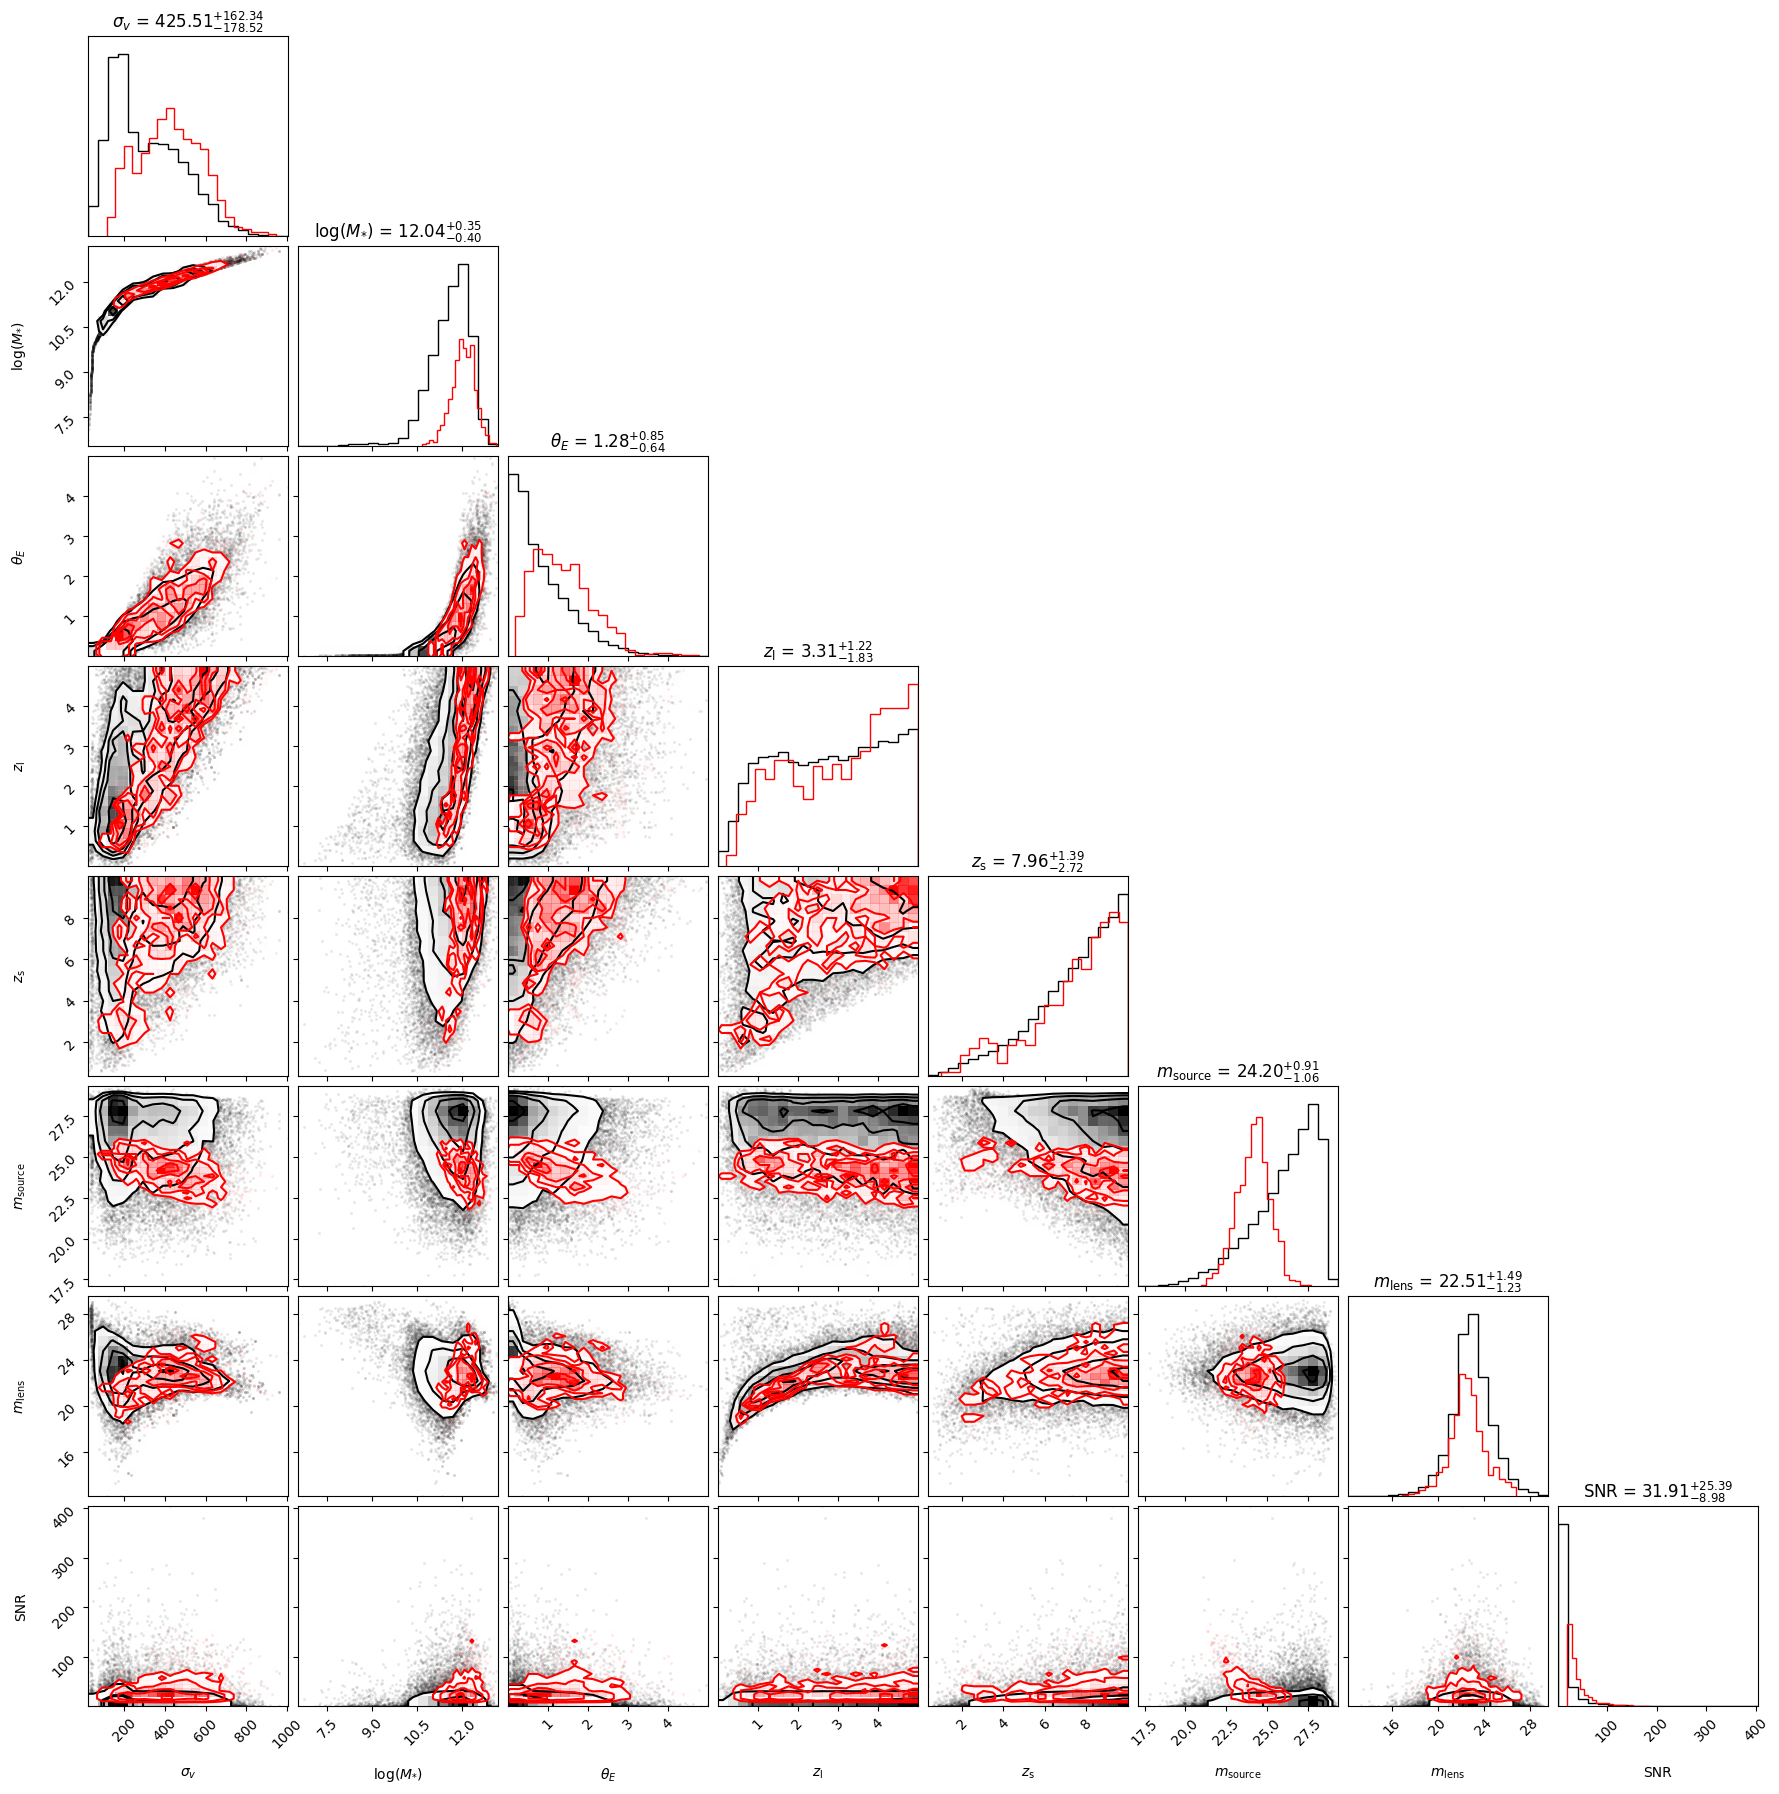

In [7]:
corner(np.array(detectable_sample), color='red', labels=labels, show_titles=True, fig=total_corner, density=True, weights=weights(detectable_sample))